In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [29]:
df = pd.read_csv('./data.csv')

In [30]:
df.head()

,Unnamed: 0,numbers,cardinality,distribution,alpha,Y
0,0,1,1,uniform,Nan,Spark
1,1,1,1,uniform,Nan,Spark
2,2,1,1,uniform,Nan,Spark
3,3,1,1,uniform,Nan,Spark
4,4,1,1,uniform,Nan,Spark


In [31]:
df.drop('Unnamed: 0',axis =1,inplace =True)

In [32]:
df.head()

,numbers,cardinality,distribution,alpha,Y
0,1,1,uniform,Nan,Spark
1,1,1,uniform,Nan,Spark
2,1,1,uniform,Nan,Spark
3,1,1,uniform,Nan,Spark
4,1,1,uniform,Nan,Spark


In [33]:
df.shape

(20000, 5)

In [34]:
### Drop duplicates 

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(6405, 5)

In [37]:
df['numbers'].nunique()

3236

In [38]:
df['cardinality'].nunique()

20

In [39]:
df['distribution'].nunique()

2

In [40]:
df['alpha'].unique()

array(['Nan', '1.0001', '1.01', '1.1', '1.3', '1.5', '1.7', '1.9', '2.0',
       '2.5', '3.5'], dtype=object)

In [41]:
df['alpha'] = df['alpha'].fillna(0)

In [42]:
df['alpha'].isna().sum()

0

In [43]:
df['Y'].value_counts()

Flink    4846
Spark    1559
Name: Y, dtype: int64

In [44]:
### Define features and output

In [45]:
x=df[['numbers','cardinality','distribution','alpha']]
y=df['Y']

In [46]:
y

0        Spark
1000     Spark
1001     Spark
1003     Spark
1005     Spark
         ...  
19231    Spark
19234    Spark
19239    Spark
19372    Spark
19404    Spark
Name: Y, Length: 6405, dtype: object

In [47]:
###Examine for empty values 

In [48]:
x.isna().sum()

numbers         0
cardinality     0
distribution    0
alpha           0
dtype: int64

In [49]:
#### Split the dataset to train and test set

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [53]:
X_train.isna().sum()

numbers         0
cardinality     0
distribution    0
alpha           0
dtype: int64

In [54]:
X_test.isna().sum()

numbers         0
cardinality     0
distribution    0
alpha           0
dtype: int64

In [55]:
y_train.isna().sum()

0

In [56]:
y_test.isna().sum()

0

In [57]:
### Because we have both numerical and categorical features we have to use one-hot-ecoding for the categorical data 
# to transform them to numerical before feeding them to the classifier.
# We also scale the numerical features 

In [58]:
features = ColumnTransformer([
    # we use spacy to convert the text columns
    # ('spacy', SpacyTransformer(), 'new_content'),
    # if we have a categorical we can convert to 'dummies' or one-hot-vectors like so:
    ('ohv', OneHotEncoder(handle_unknown='ignore' ), ['distribution']),
    # if we want to apply some sort of scaling to numerical stuff we can
    ('scaler', StandardScaler(), ['numbers','cardinality','alpha']),
    # if we don't want to apply a scaler we can pass some columns through
    # ('pt', 'passthrough', ['Web Growth Rate'])
])

In [59]:
from sklearn.svm import SVC,LinearSVC
# from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb, Pipeline

pipeline = Pipeline([('features',features),
            ('sampler',SMOTE()),
            ('cls',RandomForestClassifier())])


cv_splits = 5

param_grid = {
    'cls__bootstrap': [True],
    'cls__max_depth': [80, 90, 100, 110],
    'cls__min_samples_leaf': [3, 4, 5],
    'cls__min_samples_split': [8, 10, 12],
    'cls__n_estimators': [100, 200, 300, 1000]
}

# Create a based model


grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                          cv=cv_splits, n_jobs = -1, verbose = 10)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

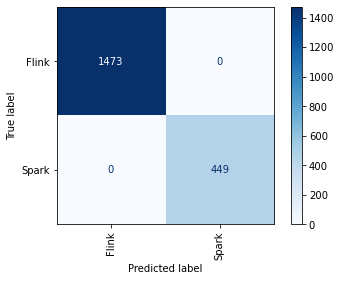

=== Confusion Matrix ===
[[1473    0]
 [   0  449]]


=== Classification Report ===
              precision    recall  f1-score   support

       Flink       1.00      1.00      1.00      1473
       Spark       1.00      1.00      1.00       449

    accuracy                           1.00      1922
   macro avg       1.00      1.00      1.00      1922
weighted avg       1.00      1.00      1.00      1922



In [24]:
import matplotlib.pyplot as plt  
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

pred_test = grid_search.predict(X_test)


plot_confusion_matrix(grid_search, X_test, y_test, xticks_rotation='vertical',cmap='Blues')
plt.show() 
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, pred_test))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, pred_test))

In [25]:
grid_search.best_params_

{'cls__bootstrap': True,
 'cls__max_depth': 80,
 'cls__min_samples_leaf': 3,
 'cls__min_samples_split': 8,
 'cls__n_estimators': 100}

In [ ]:
# clf.predict([[3, 5, ]])

In [27]:
grid_search.best_params_.predict([[3, 5, 1]])

AttributeError: 'dict' object has no attribute 'predict'